<img src="Images/PoweredTechGirlz.png" width="15%" align="right">

# Activity 3: Text Mining Harry Potter - Most Popular Words

We will be using data provided by [Bradley Boehmke](https://github.com/bradleyboehmke/harrypotter).

The goal of this class is to do a textual analysis of the seven Harry Potter books. We will use Python to discover some interesting insights that maybe nobody else in the world has realized about the Harry Potter books! In this activity we will find the most popular words and combination of words in book 1.

<img src="Images/book_covers.png" width="60%" align="left">

In [1]:
import Helpers
from Helpers.load_data import *
from Helpers.plot_data import *
from collections import Counter

# Most popular words

We will try to find out which words are the most popular in each book.

We already know how to split each book into words, but this time we will need to do two additional steps.

First, look at the following piece of text:

In [2]:
text = (
    "Hagrid: \"You're a wizard, Harry\" "
    "Harry: \"I am a what?\" "
    "Hagrid: \"A wizard, Harry\" "
)
print(text)

Hagrid: "You're a wizard, Harry" Harry: "I am a what?" Hagrid: "A wizard, Harry" 


How can we find the most popular words in this piece of text?

As it turns out, Python has another neat function which we can use to do that. It's called a `Counter`. You can give `Counter` a list of words and it will count how many times does each word appear. 

To do that, we first need a list of words. In the cell below, split the text into words and assign the result to a new variable called `words`:

In [5]:
words = text.split()
print(words)

['Hagrid:', '"You\'re', 'a', 'wizard,', 'Harry"', 'Harry:', '"I', 'am', 'a', 'what?"', 'Hagrid:', '"A', 'wizard,', 'Harry"']


Now that we have separate words, we can pass those to a `Counter`:

In [6]:
Counter(words)

Counter({'"A': 1,
         '"I': 1,
         '"You\'re': 1,
         'Hagrid:': 2,
         'Harry"': 2,
         'Harry:': 1,
         'a': 2,
         'am': 1,
         'what?"': 1,
         'wizard,': 2})

What happened? `Counter` counted the words "Harry" and "Harry:" as two separate words. It also counted "A" and "a" as two separate words.

To fix this, we will need to remove all characters from the text which are not letters, and conver the text to lowercase.

In [10]:
new_words = []
for word in words:
    word = word.lower()
    word = ''.join([i for i in word if i.isalpha()])
    new_words.append(word)
print(new_words)

['hagrid', 'youre', 'a', 'wizard', 'harry', 'harry', 'i', 'am', 'a', 'what', 'hagrid', 'a', 'wizard', 'harry']


In [12]:
Counter(new_words).most_common()

[('a', 3),
 ('harry', 3),
 ('hagrid', 2),
 ('wizard', 2),
 ('am', 1),
 ('what', 1),
 ('youre', 1),
 ('i', 1)]

This is because in Python "Harry" and "HARRY" is otherwise considered to be two different words. Therefore, we want to convert all words to lowercase.

In [2]:
book_1 = load_book_1()
words = book_1.split()

print('Words before:', words[0:26])
print()

lowercase_words = []
for word in words:
    lowercase_words.append(word.lower())
    
print('Words after:', lowercase_words[0:26])

Words before: ['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']

Words after: ['the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley,', 'of', 'number', 'four,', 'privet', 'drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']


We can use `Counter` to count occurences of all words and `matplotlib` to visualize the results:

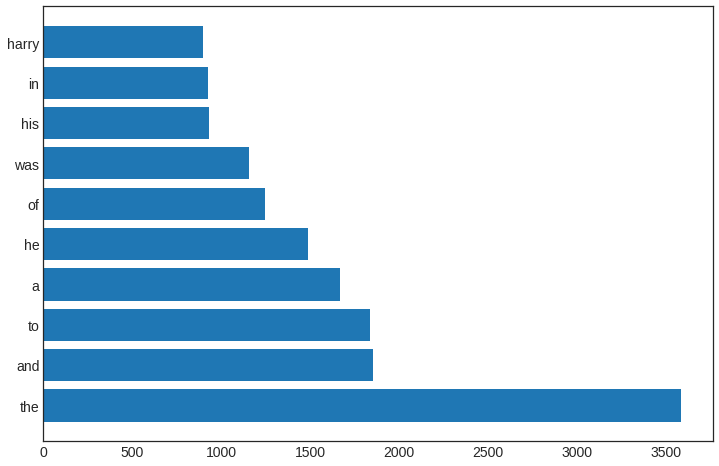

In [3]:
top_10 = Counter(lowercase_words).most_common(10)
top_10_words = []
top_10_counts = []
for word, count in top_10:
    top_10_words.append(word)
    top_10_counts.append(count)
    
plt.figure(figsize=(12, 8))

positions = range(len(top_10))
plt.barh(positions, top_10_counts)

plt.yticks(positions, top_10_words)
plt.show()

What happened?

Explain stopwords.

In [13]:
stopwords_file = 'Data/stopwords.txt'
with open(stopwords_file) as input_file:
    stopwords = input_file.read().split()
print(stopwords[0:10])

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']


In [14]:
words_without_stopwords = []
for word in lowercase_words:
    if word not in stopwords and word != 'said':
        words_without_stopwords.append(word)
print(words_without_stopwords[0:10])

['boy', 'lived', 'mr.', 'mrs.', 'dursley,', 'number', 'four,', 'privet', 'drive,', 'proud']


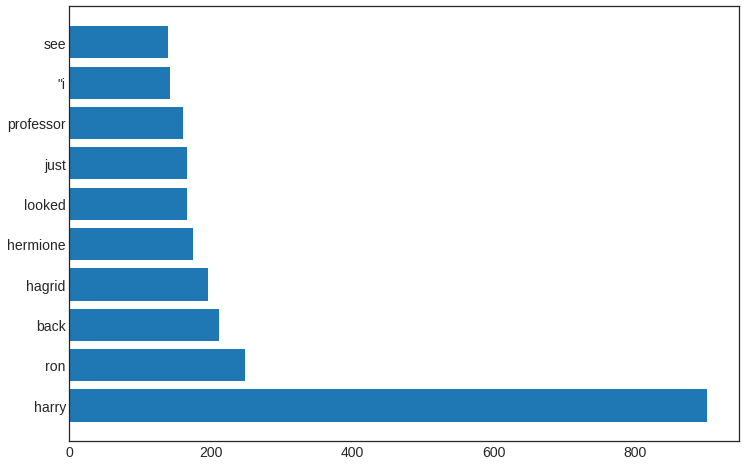

In [15]:
top_10 = Counter(words_without_stopwords).most_common(10)
top_10_words = []
top_10_counts = []
for word, count in top_10:
    top_10_words.append(word)
    top_10_counts.append(count)
    
plt.figure(figsize=(12, 8))

positions = range(len(top_10))
plt.barh(positions, top_10_counts)

plt.yticks(positions, top_10_words)
plt.show()

What about combinations of words?

Explain n-grams

In [16]:
pairs = list(zip(words_without_stopwords, words_without_stopwords[1:]))
bigrams = []
for pair in pairs:
    bigrams.append(pair[0] + ' ' + pair[1])
print(bigrams[0:10])

['boy lived', 'lived mr.', 'mr. mrs.', 'mrs. dursley,', 'dursley, number', 'number four,', 'four, privet', 'privet drive,', 'drive, proud', 'proud say']


In [17]:
Counter(bigrams).most_common(10)

[('uncle vernon', 71),
 ('professor mcgonagall', 61),
 ('aunt petunia', 42),
 ('mr. dursley', 27),
 ('harry ron', 27),
 ('harry looked', 23),
 ('harry felt', 20),
 ('uncle vernon,', 16),
 ('ron hermione', 16),
 ('nimbus two', 15)]